In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
data = pd.read_table("../DataSets/fruit_data_with_colors.txt")
data.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [26]:
# value_counts() counts the unique value in the dataframe
data.fruit_name.value_counts()
# returned data accessed with Label or index from 0
data.fruit_name.value_counts()["apple"]
data.fruit_name.value_counts()[0]

19

In [5]:
# count() counts the all value in the dataframe
data.fruit_name.count()

59

In [6]:
# unique displays unique values in the dataframe
data.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [7]:
# sum() adds up all the items in the dataframe. String will get concatinated, numbers are added up
data.fruit_name.sum()

'appleappleapplemandarinmandarinmandarinmandarinmandarinappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleorangeorangeorangeorangeorangeorangeorangeorangeorangeorangeorangeorangeorangeorangeorangeorangeorangeorangeorangelemonlemonlemonlemonlemonlemonlemonlemonlemonlemonlemonlemonlemonlemonlemonlemon'

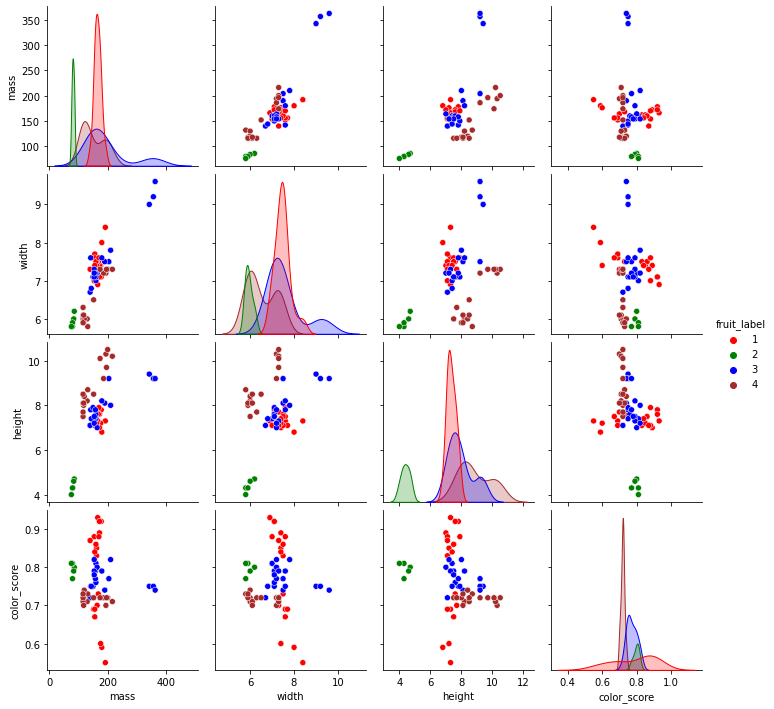

In [66]:
#palette - provide the list of colors matching to unique value in hue
sns.pairplot(data[["mass", "width", "height", "color_score", "fruit_label"]], 
             hue="fruit_label", palette=["red", "green", "blue", "brown"])

In [68]:
X = data[["mass", "width", "height", "color_score"]]
y = data["fruit_label"]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41, 4) (18, 4) (41,) (18,)


In [270]:
from sklearn.neighbors import KNeighborsClassifier

In [271]:
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [272]:
y_predicted = knnmodel.predict(X_test)

In [273]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [274]:
accuracy_score(y_test, y_predicted)

0.5

In [275]:
confusion_matrix(y_test, y_predicted)

array([[4, 0, 0, 2],
       [0, 1, 0, 0],
       [3, 0, 1, 1],
       [3, 0, 0, 3]], dtype=int64)

### Above case Accuracy is only 72%, so lets scale the data and see it imporves, say "StandardScaler"

In [393]:
from sklearn.preprocessing import StandardScaler

In [394]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [395]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
print(X_scaled_train.shape, X_scaled_test.shape, y_train.shape, y_test.shape)

(41, 4) (18, 4) (41,) (18,)


In [396]:
knnmodel_scaled = KNeighborsClassifier(n_neighbors=6) ## Reason for n value to be 6 is by analysing the accuracy score at the end
knnmodel_scaled.fit(X_scaled_train, y_train)
knnmodel_scaled.score(X_scaled_test, y_test)

0.8333333333333334

In [307]:
## After Scaling Accuracy improved from 72% to 88% some times to 94% and even 100%, better to use "random state" while splitting
## lets try different scaling, minmax scaler
## StandardScaled accuracy varies running different times

In [308]:
from sklearn.preprocessing import MinMaxScaler

In [309]:
minmaxscaler = MinMaxScaler()
X_mm_scaled = minmaxscaler.fit_transform(X)

In [310]:
X_mm_scaled_train, X_mm_scaled_test, y_train, y_test = train_test_split(X_mm_scaled, y, test_size=0.3)
print(X_mm_scaled_train.shape, X_mm_scaled_test.shape, y_train.shape, y_test.shape)

(41, 4) (18, 4) (41,) (18,)


In [311]:
knnmodel_scaled = KNeighborsClassifier(n_neighbors=3)
knnmodel_scaled.fit(X_mm_scaled_train, y_train)
knnmodel_scaled.score(X_mm_scaled_test, y_test)

0.8888888888888888

#Since Accuracy is changing lets see the sample distribution once again

In [312]:
data.fruit_name.value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

#mandarin fruit is very less in count, accuracy affects more for "mandarin"

# Lets Cross Validate

In [325]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [335]:
kfold = KFold(n_splits=10, shuffle=True) #input data has some kind of order, so shuffling the dataset

In [336]:
cv = cross_val_score(knnmodel_scaled, X_scaled, y, cv= kfold)

In [337]:
print(cv)
print("mean:", cv.mean())

[1.         0.83333333 1.         1.         0.83333333 1.
 1.         1.         1.         1.        ]
mean: 0.9666666666666668


## Lets select the suitable n_neighbors

In [397]:
accuracy_score = []
error_rate = []

for each in np.arange(1,20):
    knnmodel_for_score = KNeighborsClassifier(n_neighbors=each)
    cv = cross_val_score(knnmodel_for_score, X_scaled, y, cv= 5)
    accuracy_score.append(cv.mean())
    error_rate.append(1-cv.mean())
    
print(accuracy_score)
print(error_rate)

[0.95, 0.95, 0.9166666666666667, 0.95, 0.9, 0.8833333333333332, 0.9, 0.8833333333333332, 0.8, 0.7499999999999999, 0.6984848484848485, 0.6666666666666666, 0.5818181818181818, 0.5651515151515152, 0.42878787878787883, 0.42878787878787883, 0.35909090909090907, 0.39545454545454545, 0.3424242424242424]
[0.050000000000000044, 0.050000000000000044, 0.08333333333333326, 0.050000000000000044, 0.09999999999999998, 0.11666666666666681, 0.09999999999999998, 0.11666666666666681, 0.19999999999999996, 0.2500000000000001, 0.3015151515151515, 0.33333333333333337, 0.4181818181818182, 0.4348484848484848, 0.5712121212121212, 0.5712121212121212, 0.6409090909090909, 0.6045454545454545, 0.6575757575757576]


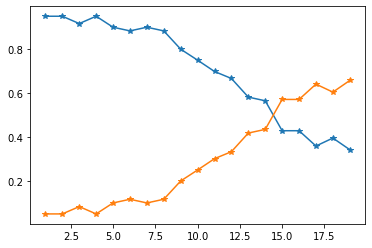

In [398]:
plt.plot(np.arange(1,20), accuracy_score, marker = '*')
plt.plot(np.arange(1,20), error_rate, marker = '*')

## n_neighbors = 6, score is decent neither bad and nor looks overfitting. 